# ITS307 Data Analytics                                                   : Spring Semester 2022
# Practical 6
# Regularization
![image.png](attachment:image.png)

# 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# 2. Load Data

In [3]:
df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
X = boston.data
y = boston.target

# 3. Train test split

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3)

# 4. Simple Linear Model

In [6]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

In [7]:
model1.score(xtrain, ytrain)

0.7419757510175955

In [8]:
model1.score(xtest, ytest)

0.716887109213284

# 5. Ridge Regularization for Linear Model

In [9]:
from sklearn.linear_model import Ridge
model2 = Ridge(alpha = 100)
model2.fit(xtrain, ytrain)

Ridge(alpha=100)

In [10]:
#The score depends on the alpha, with change in alpha score changes
model2.score(xtrain, ytrain)

0.7113049429686167

In [11]:
model2.score(xtest, ytest)

0.7035676701879372

# 6. Lasso Regularization for Linear Model

In [12]:
from sklearn.linear_model import Lasso

model3 = Lasso(alpha = 0.1)
model3.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [13]:
model3.score(xtrain, ytrain)

0.7337961181925048

In [14]:
model3.score(xtest, ytest)

0.7066020615113986

# 7. Polynomial Regression of degree 2

In [15]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 2)
xtrain_poly = pf.fit_transform(xtrain)
xtest_poly = pf.fit_transform(xtest)

In [16]:
lrp = LinearRegression()
lrp.fit(xtrain_poly, ytrain)
lrp.score(xtrain_poly,ytrain)

0.9316315719217783

In [17]:
lrp.score(xtest_poly, ytest)

0.767699957299664

# 8. Ridge Regularization for Polynomial model

In [18]:
modelrp = Ridge(alpha = 10000000)
modelrp.fit(xtrain_poly, ytrain)
modelrp.score(xtrain_poly, ytrain)

0.7701283507051472

In [19]:
modelrp.score(xtest_poly, ytest)


0.7282070761346882

# 9. Lasso Regularization for Polynomial model

In [20]:
modelrp1 = Lasso(alpha = 100)
modelrp1.fit(xtrain_poly, ytrain)
modelrp1.score(xtrain_poly, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+01, tolerance: 2.724e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7820995155133159

In [21]:
modelrp1.score(xtest_poly, ytest)

0.7408168943996789

# 10. Select K Best

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb = SelectKBest(score_func = f_regression, k = 7)
x_selected = kb.fit_transform(xtrain, ytrain)
x_selected.shape

(354, 7)

In [23]:
kb1 = LinearRegression()
kb1.fit(x_selected, ytrain)
kb1.score(x_selected, ytrain)

0.6687299741002644

In [24]:
pf2 = PolynomialFeatures(degree = 2)
xselected_poly = pf2.fit_transform(x_selected)



In [25]:
lrp3 = LinearRegression()
lrp3.fit(xselected_poly, ytrain)
lrp3.score(xselected_poly,ytrain)

0.8538390730871399

In [26]:
traindf = pd.DataFrame(data = xtrain, columns = boston.feature_names)
tdf = pd.DataFrame(data = xtest, columns = boston.feature_names)

traindf['target'] = ytrain
traindf.head()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0   0.10008  0.0   2.46   0.0  0.488  6.563  95.6  2.8470   3.0  193.0   
1   0.06417  0.0   5.96   0.0  0.499  5.933  68.2  3.3603   5.0  279.0   
2   1.38799  0.0   8.14   0.0  0.538  5.950  82.0  3.9900   4.0  307.0   
3   5.20177  0.0  18.10   1.0  0.770  6.127  83.4  2.7227  24.0  666.0   
4  10.67180  0.0  18.10   0.0  0.740  6.459  94.8  1.9879  24.0  666.0   

   PTRATIO       B  LSTAT  target  
0     17.8  396.90   5.68    32.5  
1     19.2  396.90   9.68    18.9  
2     21.0  232.60  27.71    13.2  
3     20.2  395.43  11.48    22.7  
4     20.2   43.06  23.98    11.8

In [27]:
corr = traindf.corr()

In [28]:
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   

              DIS       RAD       TAX   PTRATIO         B     LSTAT  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000

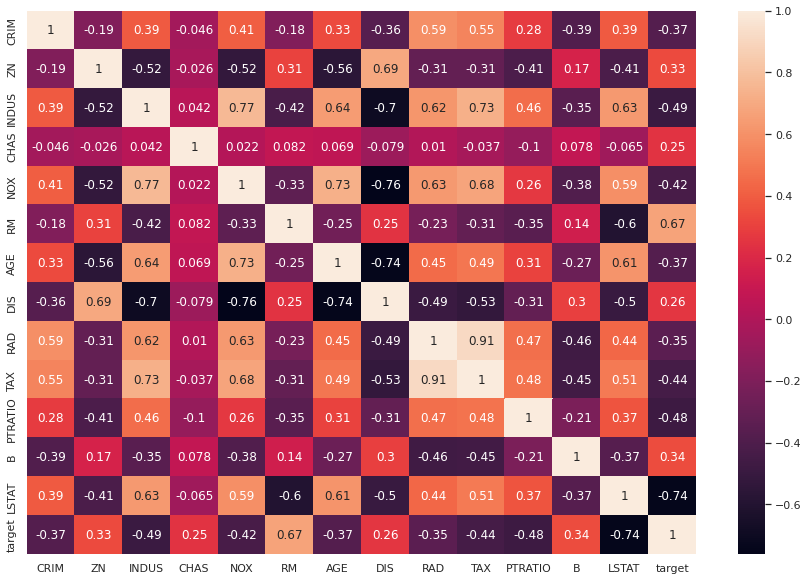

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(data = corr, annot = True)
plt.show()

In [30]:
selected_columns = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [31]:
train_selected = traindf[selected_columns]
test_selected = tdf[selected_columns]
test_selected.head()

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  0.52014  20.0   3.97   0.0  0.647  8.398   91.5  2.2885   5.0  264.0   
1  1.46336   0.0  19.58   0.0  0.605  7.489   90.8  1.9709   5.0  403.0   
2  0.26169   0.0   9.90   0.0  0.544  6.023   90.4  2.8340   4.0  304.0   
3  4.09740   0.0  19.58   0.0  0.871  5.468  100.0  1.4118   5.0  403.0   
4  7.05042   0.0  18.10   0.0  0.614  6.103   85.1  2.0218  24.0  666.0   

   PTRATIO       B  LSTAT  
0     13.0  386.86   5.91  
1     14.7  374.43   1.73  
2     18.4  396.30  11.72  
3     14.7  396.90  26.42  
4     20.2    2.52  23.29

In [32]:
lrp3 = LinearRegression()
lrp3.fit(train_selected, ytrain)
lrp3.score(train_selected, ytrain)

0.7419757510175955

In [33]:
lrp3.score(test_selected,ytest)

0.7168871092132847

# 11. Conclusion

From todays class, i learned that regularization has two regression, Lasso and Ridge.
Regularization is done to handle the issues of overfitting. In the above dataset, while we tried to fit it with linear regression, we found that there is overfitting, so we used regularization. The advantage of using regularization is that, if you use Lasso, you dont have to do feature selection. And moreover, Lasso and Ridge can be used to measure the accuracy of the given model.